# Load packages

In [15]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import src.utils.utils as utils
from src.visualisation.VisualiseTrajectories import VisualiseTrajectories
from src.data.Datasets import AISDiscreteRepresentation
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
import numpy as np
style.use("seaborn-colorblind")

# Define the region to look into
region = "Bornholm"
zoom = 8
n = 6

In [2]:
# Use the SummaryModels class for everything related to the reconstructions
file_name = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
learning_rate = 0.0005
intermediate_epoch = 400
contrario_epsilon=1e-27
summary_models = SummaryModels(file_name, intermediate_epoch=intermediate_epoch, learning_rate=learning_rate)

In [3]:
outliers = utils.read_data_info_file(summary_models.project_dir / "outliers" /
                                     ("outliers_eps" + str(1e-9) + "_"
                                      + summary_models.model_name + ".pkl"))
sum(outliers["test_outliers"])

39

In [4]:
outliers = utils.read_data_info_file(summary_models.project_dir / "outliers" /
                                     ("outliers_eps" + str(1e-12) + "_"
                                      + summary_models.model_name + ".pkl"))
sum(outliers["test_outliers"])

35

In [5]:
outliers = utils.read_data_info_file(summary_models.project_dir / "outliers" /
                                     ("outliers_eps" + str(1e-18) + "_"
                                      + summary_models.model_name + ".pkl"))
sum(outliers["test_outliers"])

25

In [6]:
outliers = utils.read_data_info_file(summary_models.project_dir / "outliers" /
                                     ("outliers_eps" + str(1e-27) + "_"
                                      + summary_models.model_name + ".pkl"))
sum(outliers["test_outliers"])

17

In [7]:
# Use the VisualiseTrajectories class for geographically visualising trajectories 
fig_size = (10, 10)
visualise_trajectories_discrete = VisualiseTrajectories(region, save_figures=True, plot_figures=True, fig_size=fig_size,
                                                        zoom=zoom, continuous_representation=False)
processed_data_dir =  visualise_trajectories_discrete.processed_data_dir

# Read the info file to know how to read the data file
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")
data_info = utils.read_data_info_file(data_info_file)

# Load the static Google Map image for the RIO
img = visualise_trajectories_discrete.read_static_map()

# Get the test set outliers
outliers = utils.read_data_info_file(summary_models.project_dir / "outliers" /
                                     ("outliers_eps" + str(contrario_epsilon) + "_"
                                      + summary_models.model_name + ".pkl"))

In [8]:
outlier_indicies = [i for (i, v) in zip(data_info["testIndicies"], outliers["test_outliers"]) if v]
normal_indicies = [i for (i, v) in zip(data_info["testIndicies"], outliers["test_outliers"]) if not v]

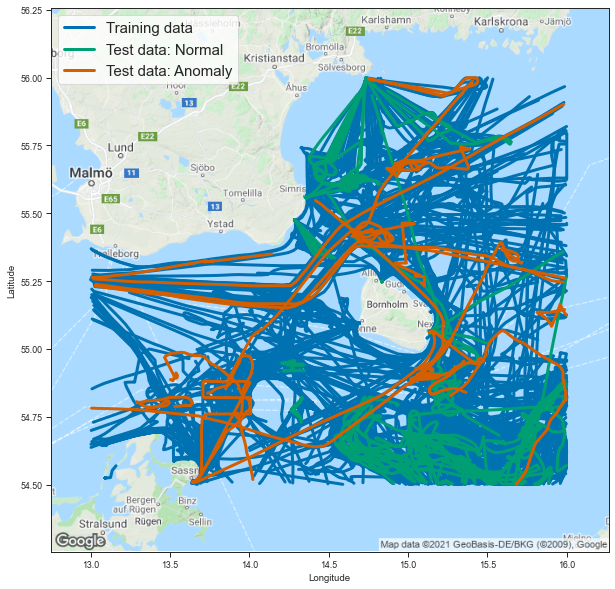

In [9]:
import matplotlib.pyplot as plt

fig, ax = visualise_trajectories_discrete.visualise_static_map(img)
plot_figures_tmp = visualise_trajectories_discrete.plot_figures
visualise_trajectories_discrete.plot_figures = False

# Plot training trajectories
tracks = visualise_trajectories_discrete.plot_multiple_tracks(
        ax,
        indicies=data_info["trainIndicies"],
        data_path=data_file,
        color=sns.color_palette()[0],
        plot_start=False,
        plot_end=False,
        s=100,
        fig=fig,
)

# Plot normal test trajectories
tracks = visualise_trajectories_discrete.plot_multiple_tracks(
        ax,
        indicies=normal_indicies,
        data_path=data_file,
        color=sns.color_palette()[1],
        plot_start=False,
        plot_end=False,
        s=100,
        fig=fig,
)

# Plot abnormal test trajectories
ax.legend(loc='upper left', labels=['Training data', 'Test data: Normal', 'Test data: Anomaly'], fontsize=15) # 37)
leg = ax.get_legend()
leg.legendHandles[0].set_color(sns.color_palette()[0])
leg.legendHandles[1].set_color(sns.color_palette()[1])
leg.legendHandles[2].set_color(sns.color_palette()[2])
visualise_trajectories_discrete.plot_figures = plot_figures_tmp
tracks = visualise_trajectories_discrete.plot_multiple_tracks(
        ax,
        indicies=outlier_indicies,
        data_path=data_file,
        color=sns.color_palette()[2],
        plot_start=False,
        plot_end=False,
        s=100,
        fig=fig,
)

In [10]:
lats, lons = [], []
for idx in data_info["trainIndicies"]:
    df_lon_lat = utils.get_track_by_index(
        data_file, idx, keep_cols=["Longitude", "Latitude"]
    )
    lats += list(df_lon_lat["Latitude"])
    lons += list(df_lon_lat["Longitude"])
df_fishing_train = pd.DataFrame(
    {'Latitude': lats,
     'Longitude': lons,
    }
)

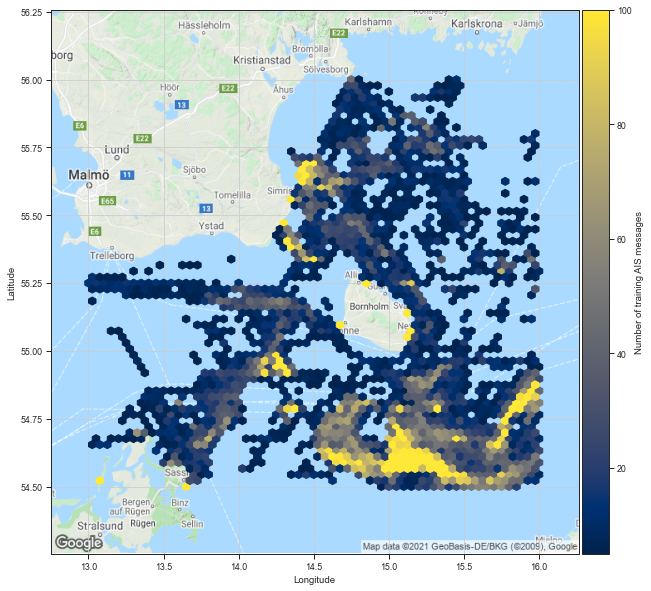

In [11]:
# Plot a heatmap of the AIS update geographic points on the static map - Fishing vessels
type = "Hex"
cb_label = "Number of training AIS messages"
x = "Longitude"
y = "Latitude"
visualise_trajectories_discrete.plot_points(
    df_fishing_train,
    type=type,
    x=x,
    y=y,
    bins=60,
    vmax=100,
    cmin=5,
    cb_label=cb_label,
    # file_name="AIS_heatmap_Fishing",
)

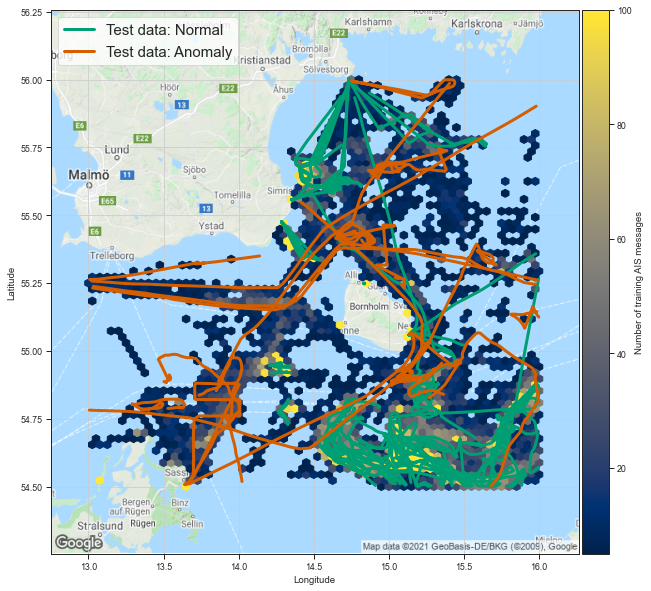

In [12]:
fig, ax = visualise_trajectories_discrete.visualise_static_map(img)
plot_figures_tmp = visualise_trajectories_discrete.plot_figures
visualise_trajectories_discrete.plot_figures = False

# Plot a heatmap of the AIS training update geographic points on the static map
type = "Hex"
cb_label = "Number of training AIS messages"
x = "Longitude"
y = "Latitude"
visualise_trajectories_discrete.plot_points(
    df_fishing_train,
    type=type,
    x=x,
    y=y,
    bins=60,
    vmax=100,
    cmin=5,
    cb_label=cb_label,
    # file_name="AIS_heatmap_Fishing",
    ax=ax,
    fig=fig
)

# Plot normal test trajectories
tracks = visualise_trajectories_discrete.plot_multiple_tracks(
        ax,
        indicies=normal_indicies,
        data_path=data_file,
        color=sns.color_palette()[1],
        plot_start=False,
        plot_end=False,
        s=100,
        fig=fig,
        plot_axis=True
)

# Plot abnormal test trajectories
ax.legend(loc='upper left', labels=['Test data: Normal', 'Test data: Anomaly'], fontsize=15) # 37)
leg = ax.get_legend()
leg.legendHandles[0].set_color(sns.color_palette()[1])
leg.legendHandles[1].set_color(sns.color_palette()[2])
visualise_trajectories_discrete.plot_figures = plot_figures_tmp
tracks = visualise_trajectories_discrete.plot_multiple_tracks(
        ax,
        indicies=outlier_indicies,
        data_path=data_file,
        color=sns.color_palette()[2],
        plot_start=False,
        plot_end=False,
        s=100,
        fig=fig,
        plot_axis=True
)

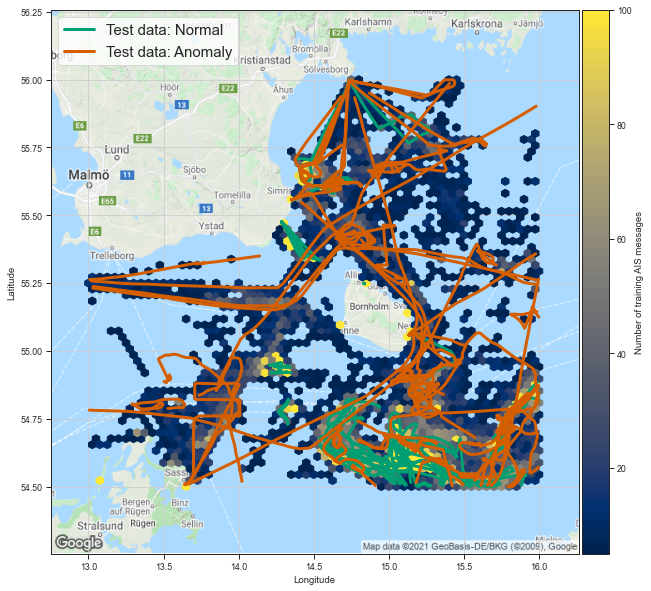

In [13]:
outliers = utils.read_data_info_file(summary_models.project_dir / "outliers" /
                                     ("outliers_eps" + str(1e-9) + "_"
                                      + summary_models.model_name + ".pkl"))
outlier_indicies = [i for (i, v) in zip(data_info["testIndicies"], outliers["test_outliers"]) if v]
normal_indicies = [i for (i, v) in zip(data_info["testIndicies"], outliers["test_outliers"]) if not v]

fig, ax = visualise_trajectories_discrete.visualise_static_map(img)
plot_figures_tmp = visualise_trajectories_discrete.plot_figures
visualise_trajectories_discrete.plot_figures = False

# Plot a heatmap of the AIS training update geographic points on the static map
type = "Hex"
cb_label = "Number of training AIS messages"
x = "Longitude"
y = "Latitude"
visualise_trajectories_discrete.plot_points(
    df_fishing_train,
    type=type,
    x=x,
    y=y,
    bins=60,
    vmax=100,
    cmin=5,
    cb_label=cb_label,
    # file_name="AIS_heatmap_Fishing",
    ax=ax,
    fig=fig
)

# Plot normal test trajectories
tracks = visualise_trajectories_discrete.plot_multiple_tracks(
        ax,
        indicies=normal_indicies,
        data_path=data_file,
        color=sns.color_palette()[1],
        plot_start=False,
        plot_end=False,
        s=100,
        fig=fig,
        plot_axis=True
)

# Plot abnormal test trajectories
ax.legend(loc='upper left', labels=['Test data: Normal', 'Test data: Anomaly'], fontsize=15) # 37)
leg = ax.get_legend()
leg.legendHandles[0].set_color(sns.color_palette()[1])
leg.legendHandles[1].set_color(sns.color_palette()[2])
visualise_trajectories_discrete.plot_figures = plot_figures_tmp
tracks = visualise_trajectories_discrete.plot_multiple_tracks(
        ax,
        indicies=outlier_indicies,
        data_path=data_file,
        color=sns.color_palette()[2],
        plot_start=False,
        plot_end=False,
        s=100,
        fig=fig,
        plot_axis=True
)